<a href="https://colab.research.google.com/github/MLRG-CEFET-RJ/ml-class/blob/master/ml_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Task

As a recap, remember that ML techniques can be categorized in two ways: 

*   descriptive *vs* predictive;
*   supervised *vs* unsupervised.

Clustering is an unsupervised learning, descriptive task. An unsupervised learning method tries to draw patterns from a dataset consisting of examples without labelled responses. In clustering, the goal is to identify the naturally existing groups of similar examples in the dataset.

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg)

A popular application of clustering is market segmentation. From Wikipedia:

> Market segmentation is the activity of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers (known as segments) based on some type of shared characteristics.

![alt text](https://dotcom.nlcdn.com/wp-content/uploads/2019/10/Market-Segmentation_Featured-1140x768@2x-80-min.jpg)

There are several algorithms for clustering. Here, we will study two of them, $k$-means and DBSCAN.




## $k$-means

The $k$-means algorithm looks for a predetermined number of groups (*clusters*) in an unlabeled multidimensional dataset. This is done using a simple design of what the ideal cluster looks like:

* The "cluster center" is the arithmetic mean of all points belonging to the cluster.
* Each point is closer to its own cluster center than to other cluster centers.

The following figure ([source](http://shabal.in/visuals/kmeans/2.html)) ilustrates the behavior of $k$-means. Click [here](http://shabal.in/visuals/kmeans/2.html) to see an animated version.

![alt text](http://shabal.in/visuals/kmeans/left.gif)

You can also yout this [link](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) to get further intuition about the behaviour of $k$-means.

###  $k$-Means in Scikit-Learn

Scikit-Learn provides an implementation of the $k$-means algorithm. See the example below.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


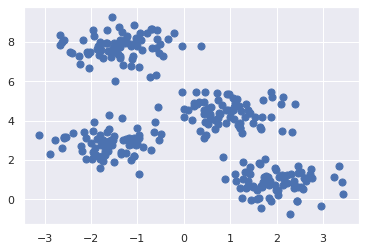

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

The above dataset has clearly a clustering configuration composed of four clusters. There, we configure $k$-means with `n_clusters=4`.

In [ ]:
from sklearn.cluster import KMeans

# notice that we have to provide the amount of clusters we want.
kmeans = KMeans(n_clusters=4)

# run k-means to find the clustering configuration
kmeans.fit(X)

# each cluster is identified by an integer label
y_kmeans = kmeans.predict(X)

In [ ]:
print(y_kmeans.shape)

(300,)


The function `predict` returns the cluster labels to which each point was assigned.

In [ ]:
y_kmeans

array([3, 2, 1, 2, 3, 3, 0, 1, 2, 2, 0, 2, 1, 2, 3, 1, 1, 3, 0, 0, 3, 3,
       1, 0, 0, 1, 3, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 3, 1, 0, 1, 1,
       0, 0, 2, 0, 2, 3, 0, 3, 2, 3, 3, 0, 2, 0, 2, 3, 2, 1, 2, 0, 0, 0,
       2, 3, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 3, 2, 3, 1, 3, 3, 2, 1, 3, 1,
       2, 2, 1, 3, 2, 0, 0, 1, 3, 3, 1, 0, 2, 3, 2, 3, 1, 3, 3, 1, 2, 1,
       0, 0, 3, 2, 3, 1, 2, 3, 3, 1, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 2, 0,
       0, 3, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1,
       3, 0, 2, 0, 3, 1, 2, 1, 1, 3, 1, 0, 0, 1, 3, 1, 1, 2, 3, 1, 0, 2,
       3, 3, 1, 0, 3, 1, 0, 0, 1, 1, 1, 1, 3, 2, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 2, 1, 0, 3, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 3, 3, 1,
       2, 3, 3, 0, 3, 0, 1, 2, 2, 1, 1, 2, 1, 3, 0, 1, 3, 0, 2, 0, 3, 1,
       3, 2, 2, 2, 2, 0, 0, 2, 1, 0, 3, 1, 0, 0, 0, 3, 3, 2, 1, 1, 0, 3,
       2, 0, 1, 2, 1, 3, 3, 0, 0, 1, 3, 3, 3, 1, 2, 2, 3, 3, 1, 3, 3, 3,
       2, 0, 2, 1, 3, 3, 2, 2, 2, 3, 3, 1, 2, 0], d

The same information can be obtained through the attribute `labels_`

In [ ]:
print(kmeans.labels_)

[3 2 1 2 3 3 0 1 2 2 0 2 1 2 3 1 1 3 0 0 3 3 1 0 0 1 3 1 0 1 2 2 1 2 2 2 2
 2 0 3 1 0 1 1 0 0 2 0 2 3 0 3 2 3 3 0 2 0 2 3 2 1 2 0 0 0 2 3 2 0 1 0 2 0
 0 2 0 1 3 2 3 1 3 3 2 1 3 1 2 2 1 3 2 0 0 1 3 3 1 0 2 3 2 3 1 3 3 1 2 1 0
 0 3 2 3 1 2 3 3 1 0 3 0 3 3 3 3 0 3 0 2 0 0 3 2 0 0 2 1 2 2 0 1 0 1 0 2 1
 2 2 2 1 2 1 3 0 2 0 3 1 2 1 1 3 1 0 0 1 3 1 1 2 3 1 0 2 3 3 1 0 3 1 0 0 1
 1 1 1 3 2 1 0 1 1 0 0 0 1 0 2 1 0 3 0 1 2 0 2 1 2 1 0 1 1 2 0 0 3 3 1 2 3
 3 0 3 0 1 2 2 1 1 2 1 3 0 1 3 0 2 0 3 1 3 2 2 2 2 0 0 2 1 0 3 1 0 0 0 3 3
 2 1 1 0 3 2 0 1 2 1 3 3 0 0 1 3 3 3 1 2 2 3 3 1 3 3 3 2 0 2 1 3 3 2 2 2 3
 3 1 2 0]


We can also inspect the centers of each generated cluster:

In [ ]:
kmeans.cluster_centers_

array([[-1.58438467,  2.83081263],
       [ 0.94973532,  4.41906906],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314]])

For this toy bi-dimensional dataset, we can actually visualize the clustering configuration generated by $k$-means.

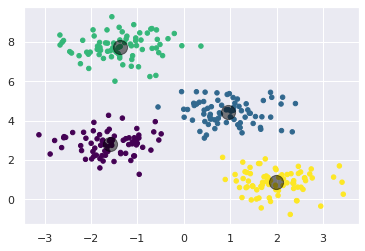

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Discussion

- The appropriate value $k$ for a particular dataset must be discovered experimentally. (More about this later.)

- It may be necessary to run $k$-means several times to come up with a reasonable clustering configuration.

- $k$-means works properly when the naturally existing clusters in the dataset:

  * have approximately spherical forms,
  * are well separated,
  * have similar volumes,
  * have similar amounts of points.

Example of approximately spherical clusters (left and right):

![alt text](https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs40595-016-0086-9/MediaObjects/40595_2016_86_Fig1_HTML.gif?as=webp)

Example of non-spherical clusters:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/clusteringg.jpg" width="400"/>

Example of well separated (left) and not well separeted (right) clusters:

![alt text](https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs40595-016-0086-9/MediaObjects/40595_2016_86_Fig2_HTML.gif?as=webp)

The following example shows a scenario in which $k$-means is not the appropriate clustering algorithm to use (because the clusters are not approximately spherical).

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

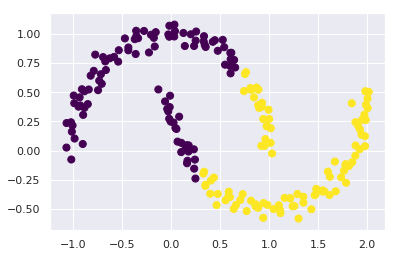

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## DBSCAN

The DBSCAN (*Density-Based Spatial Clustering of Applications with Noise*) algorithm captures the perception that a cluster is a dense set of spatially close points. The idea is that, if a specific point belongs to a cluster, it must be close to many other points in that same cluster.

DBSCAN has two hyperparameters:
* $\epsilon \in \Re$
* minPoints $\in Z$

Based on the values of the above hyperparameters, DBSCAN categorizes each point in the dataset as belonging to one of three possible types: core, border, and outlier. Consider a point $p$ in the dataset.

- $p$ is said to be a *core point* if there are at least `minPoints` points inside its ball (including $p$ itself);

- If $p$ if not a core point, but is at a distance at most $\epsilon$ from some core point, the $p$ is said to be an *border point* (aka *edge point*).

- If $p$ is neither a core point nor an edge point, the $p$ is said to be an *outlier* (aka *noise point*).

The image below ([source](https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html)) illustrates the tree types of points.

![texto alternativo](https://miro.medium.com/max/627/1*yT96veo7Zb5QeswV7Vr7YQ.png)

To get an understanding of how DBSCAN uses those point categories to find clusters in data, consider the image below ([source](https://en.wikipedia.org/wiki/DBSCAN)), that presents nine points in a 2-dimensional toy dataset. These points are colored blue, red, or yellow. Each point has a ball around itself, the radius of which is $\epsilon$. Also, consider that $\operatorname{minPoints} = 4$. Red points are core points because their respective balls have at least 4 points. The yellow points are not core points, but are reachable from some core point; therefore, they are edge points. Point in blue is an outlier.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/1024px-DBSCAN-Illustration.svg.png)

At the beginning of its execution, DBSCAN randomly selects a point $p$ from the dataset. If there are at least $\operatorname{minPoints}$ points within a distance of up to $\epsilon$ from $p$ (including $p$ itself), DBSCAN considers all of them as part of a "cluster". Then, this cluster is expanded by checking all points inside $p$'s $\epsilon$-ball; if they are either core or edge points, they are added to the cluster recursively. Eventually, there will be no more points to add to the cluster. At that point, DBSCAN chooses a new arbitrary point and repeats the process. It may happen that the selected point $p$ has less than $\operatorname{minPoints}$ points in your $\epsilon$-ball and is also not part of any other cluster. If that is the case, $p$ is considered a "noise point" and is not assigned to any cluster.

The image below ([source](https://julienbeaulieu.gitbook.io/wiki/sciences/machine-learning/unsupervised-learning/cluster-validation)) provides an example of a possible clustering configurating found by DBSCAN.

![alt text](https://gblobscdn.gitbook.com/assets%2F-LagOeJ2nL90MQERwhxy%2F-LmpDXaJYiI3aUWErGxL%2F-LmucpOLDDwbrC_bUPRG%2Fimage.png?alt=media&token=6cee1e81-220c-4a8a-a8c0-e68dbd2b749d)

The following link visually illustrates the behavior of DBSCAN during execution: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

### DBSCAN in Scikit-Learn

Scikit-Learn provides an implementation of DBSCAN through the [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) class. In this class, the parameters `eps` and `min_samples` correspond to $\operatorname{minPoints}$ and $\epsilon$, respectively.

After the function `fit` is called, the clusters found by DBSCAN can be inspected through the attribute `labels_`.

The following example, adapted from the [Scikit-Learn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html), shows how the [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) class can be used.

First, a synthetic dataset is generated. Notice that the points in this dataset naturally group into three clusters.

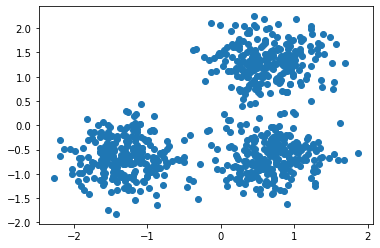

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

# Before running any clustering algorithm that uses distances 
# as a part of its optimization, it is important to scale features.
X = StandardScaler().fit_transform(X)

plt.plot(X[:, 0], X[:, 1], 'o', markersize=6)

Now, DBSCAN is applied.

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
print(labels)

[-1  3 -1  7 -1 -1 -1  1 -1 -1  0 -1  1 -1 -1  4  1 -1  0 -1 -1  2 -1  0
  0 -1  2 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1  2 -1  5 -1 -1  5  0  7  0
  3 -1 -1  6 -1  2 -1  0 -1 -1  3  2 -1  4 -1  0 -1  0 -1  6 -1  0 -1 -1
  7  0 -1 -1  0  1  6 -1 -1  4 -1  2 -1 -1  6 -1 -1  3  4  2 -1  0  0 -1
 -1 -1 -1 -1 -1 -1 -1  6  1 -1 -1  1 -1 -1 -1 -1  2 -1  2 -1  3 -1 -1 -1
 -1  2 -1  2 -1  2  2 -1 -1  5 -1  5  5 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1
 -1  5  3 -1 -1  3  3  1 -1 -1 -1  0 -1  5  2  1 -1  4  4 -1  1 -1 -1 -1
 -1 -1 -1 -1  2 -1 -1  7 -1 -1  4  0  6 -1 -1  0 -1  1 -1  1 -1 -1 -1  0
  1  4 -1 -1 -1 -1  5  3 -1  0 -1  5 -1 -1  0 -1  1 -1  1  0 -1 -1  3 -1
  0 -1 -1  4  3  6 -1 -1 -1 -1 -1 -1  7 -1  1 -1  4 -1  0  1  2  0 -1  0
 -1 -1 -1  3  3  3  3 -1  0 -1 -1  0  2 -1  0 -1 -1 -1  2  3  1 -1 -1  2
 -1  0 -1 -1 -1 -1  2 -1  5 -1 -1 -1 -1 -1  7  3 -1 -1 -1  6  6 -1  3 -1
 -1  4 -1  2 -1 -1  7 -1 -1  4 -1  0]


Finally, the clustering solution is plotted below. In the generated clustering, notice that points categorized as outliers by DBSCAN are shown in black. The green, red and yellow points are located in one of the three dense clusters found by the algorithm.

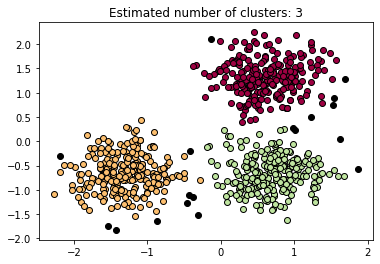

In [ ]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

The example below shows how DBSCAN behaves in the *two moons* dataset.

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Now that the synthetic dataset in generated, we apply DBSCAN on it an plot the generated clusters.

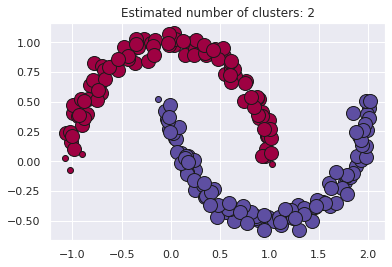

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Discussion

At first, DBSCAN seems to solve the problems that $k$-means presents. For example, in DBSCAN, the user does not have to specify the number of clusters to be found. Also, DBSCAN is able to find clusters with more general shapes. However, finding the appropriate values for the hyperparameters $\operatorname{minPoints}$ and $\epsilon$ in a given dataset is not an easy task in practice. In particular, DBSCAN may find problems to produce a clustering for a dataset that presents spatial regions of different densities (because finding appropriate values for $\operatorname{minPoints}$ and $\epsilon$ would be difficult).

## Clustering validation

Clustering validation is the procedure of evaluating the quality (goodness) of a given clustering configuration. There are several evaluation measures for validating a clustering configuration produced by an algorithm. These measures can be of two types:

* Internal evaluation, which uses the internal information of the clustering process to assess the quality of a clustering structure without reference to external information.
* External evaluation, which consists of comparing the results of a cluster analysis with a known result, such as class labels provided externally. This type of evaluation measures the extent to which the cluster labels correspond to the class labels provided externally.

### Adjusted Rand Index (ARI)

ARI is a function that measures the similarity between the ground truth and the assignments produced by the algorithm, ignoring permutations The main characteristics of this measure are the following.

* It is limited to the range [-1, 1]: negative values ​​indicate bad clustering configurations; a configuration consistent with the external labeling has a positive ARI; 1.0 is the perfect match score. Random tag assignments have an ARI score next to 0.0, regardeles of the amount of clusters and the amount of examples.

* No assumptions are made about the structure of the clusters. Therefore, this measure can be used to compare different clustering algorithms (like $k$-means and DBSCAN).

The image below ([source](https://julienbeaulieu.gitbook.io/wiki/sciences/machine-learning/unsupervised-learning/cluster-validation)) presents different values for ARI and their corresponding clustering configurations.

![alt text](https://gblobscdn.gitbook.com/assets%2F-LagOeJ2nL90MQERwhxy%2F-LmpDXaJYiI3aUWErGxL%2F-LmvIVFepQ2ZuTq01IaV%2Fimage.png?alt=media&token=6b5e6f2b-acec-4d67-87ed-bfe210efdb19)



Scikit-Learn implements several clustering validation measures. The code cell below gives an example how to compute ARI (which Scikit-Learn calls *Adjusted Rand Score*).

Given the knowledge of the true assignments of the class in the `labels_true` parameter, and the assignments produced by the clustering algorithm in `labels_pred`, the function `adjusted_rand_score` produces the corresponding value for ARI. 

In [ ]:
from sklearn import metrics

# ground truth
labels_true = [0, 0, 0, 1, 1, 1]

# A perfect match between the ground truth and the assigned labels has maximum ARI.
labels_pred = [1, 1, 1, 2, 2, 2]
print(metrics.adjusted_rand_score(labels_true, labels_pred))

# An imperfect match produces a lower ARI value
labels_pred = [1, 1, 0, 0, 3, 3]
print(metrics.adjusted_rand_score(labels_true, labels_pred))

1.0
0.24242424242424246


A bad clustering produces a negative or close to zero value for the ARI.

In [ ]:
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
print(metrics.adjusted_rand_score(labels_true, labels_pred))

-0.12903225806451613


### Homogeneity (external)

A good clustering is highly homogeneous if all of its clusters contain only data points that are members of a single class.

This metric is independent of the absolute values ​​of the labels: a permutation of the values ​​of the class or cluster labels does not change the score value in any way.

In Scikit-Learn, the function [homogeneity_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html) implements the measure of homogeneity. This function produces a value between 0.0 and 1.0, the latter corresponding to a clustering that is maximally consistent with the ground truth.

A clustering consistent with the ground truth has maximum homogeneity:

In [ ]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

A disadvantage of this evaluation measure is that inadequate clusterings that further divide examples into more clusters than the naturally existing can be perfectly homogeneous:


In [ ]:
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

1.000000
1.000000


Clusters that include examples from different classes do not offer homogeneous labeling:

In [ ]:
print("%.6f" % homogeneity_score([0, 0, 1, 1, 1], [0, 1, 0, 1, 1]))
print("%.6f" % homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.020571
0.000000


### Sum of Squared Errors - SSE (internal)

SSE is an evaluation measure appropriate for clustering algorithms that work with the concept of center of a cluster, like $k$-means. This measure corresponds to sum the squared distances of all examples to the center of their corresponding clusters.

In $k$-means, this measure can be used along with the [Elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) to select the appropriate value of $k$ for a particular dataset. This method corresponds to plot SS against several values of $k$ to visually pick the adequate amount of clusters for a dataset. See the plot below (source [link text](datascienceplus.com/k-means-clustering)).

![alt text](https://datascienceplus.com/wp-content/uploads/2019/09/1.png)

The example below illustrates the application of the Elbow method to discover the appropriate value of $k$ for the Iris dataset.

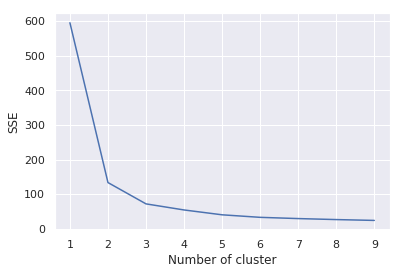

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])

data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

By visually inspecting the above plot, we can conclude that good values for $k$ are either 2 or 3.

### Silhouette Analysis

From Wikipedia:
> The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

This measure varies in the range $[-1, +1]$, such that

* a value close to +1 indicates that the example is far from neighboring clusters, that is, the generated clusters are well separated;
* a value close to 0 indicates that the example is within or very close to the decision boundary between two neighboring clusters, that is, there may be overlaping clusters;
* a negative value ​​indicates that the example may have been allocated to the wrong cluster, and that there may exist a more similar cluster.

In Scikit-Learn, the function [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) calculates the average silhouette coefficient of all samples in a dataset.

The silhouette coefficient for an example is calculated using the average intra-cluster distance ($a$) and the average distance of the closest cluster ($b$) to the example, according to the following formula:

$$
\frac{b - a} {\max(a, b)}
$$

In the above expression, $b$ is the distance between the example and the nearest cluster that the example is not part of. The silhouette coefficient is defined only if the number of clusters $k$ is such that $ 2 \leq k \leq m - 1$, $m$ being the amount of examples in the dataset.

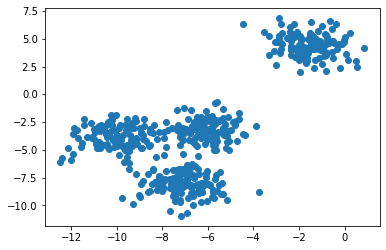

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

plt.scatter(X[:, 0], X[:, 1])

A silhouette plot is graph that shows how close each point in a cluster is to points in neighboring clusters and therefore provides a visual way to evaluate parameters such as the number of clusters. 

In the following code example ([source](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py )), silhouette analysis is used to choose an ideal value for $k$ (which Scikit-Learn names `n_clusters`). The silhouette graph shows that `n_clusters` values of 3, 5 and 6 are poor choices for the dataset provided due to the presence of clusters with scores below the silhouette average and also due to large fluctuations in the size of the silhouette graphics. Silhouette analysis is more ambivalent in the decision between values 2 and 4.

Also from the thickness of the silhouette graphic, the size of the cluster can be visualized. The silhouette graph for cluster 0, when `n_clusters` is equal to 2, is larger in size due to the grouping of the 3 subclusters in a large cluster. However, when `n_clusters` is equal to 4, all graphs are more or less similar in thickness and therefore have similar sizes, as can also be seen in the scatter plot labeled on the right.

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


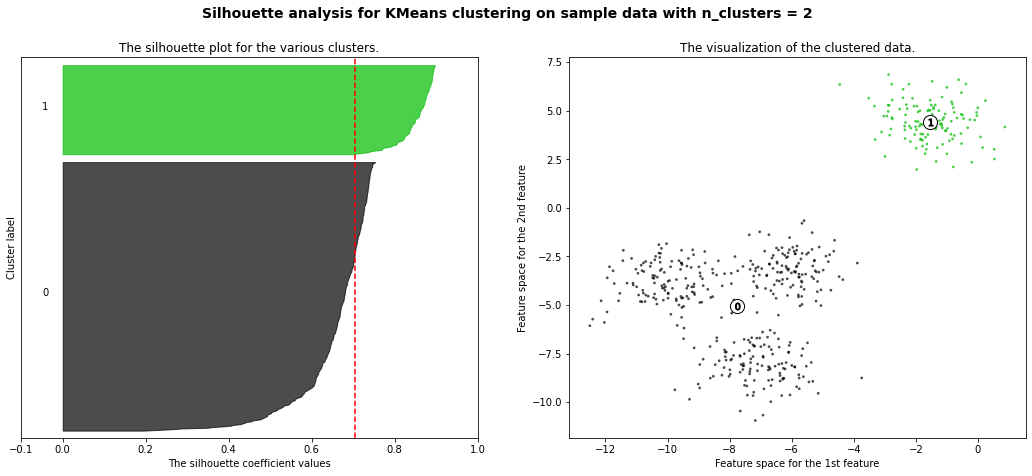

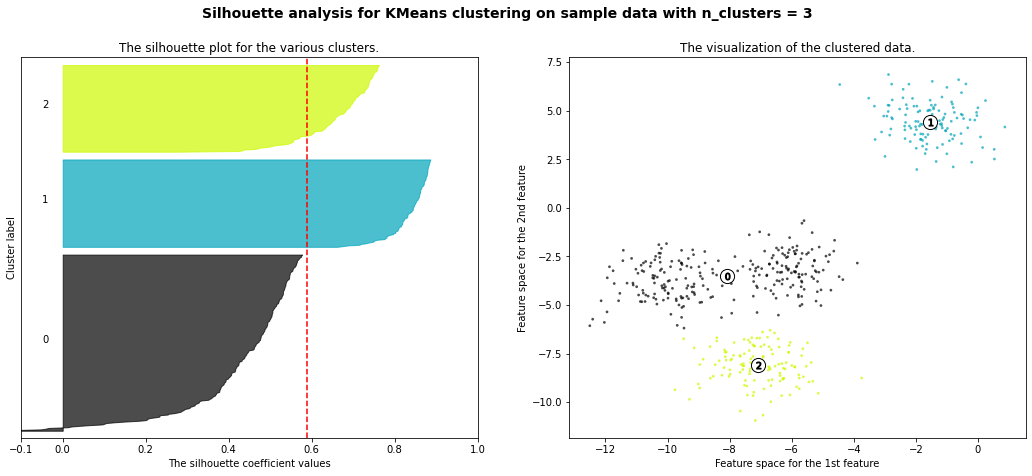

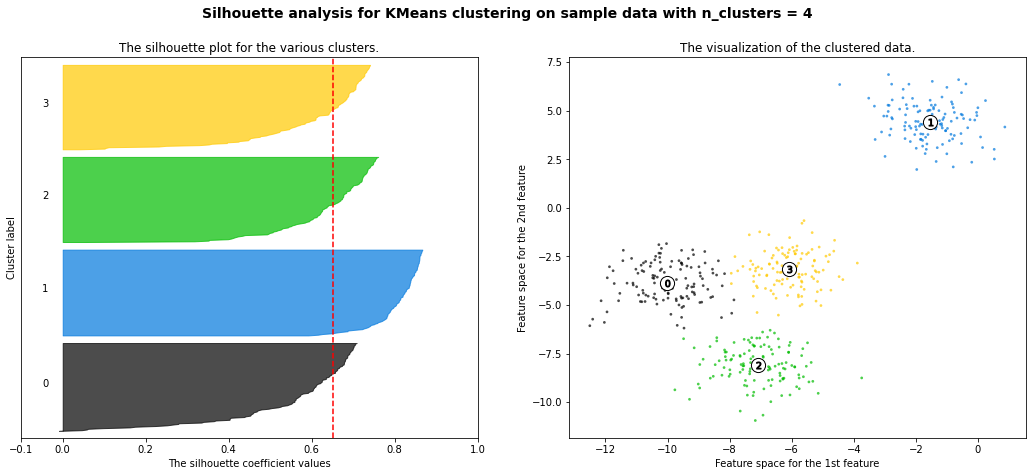

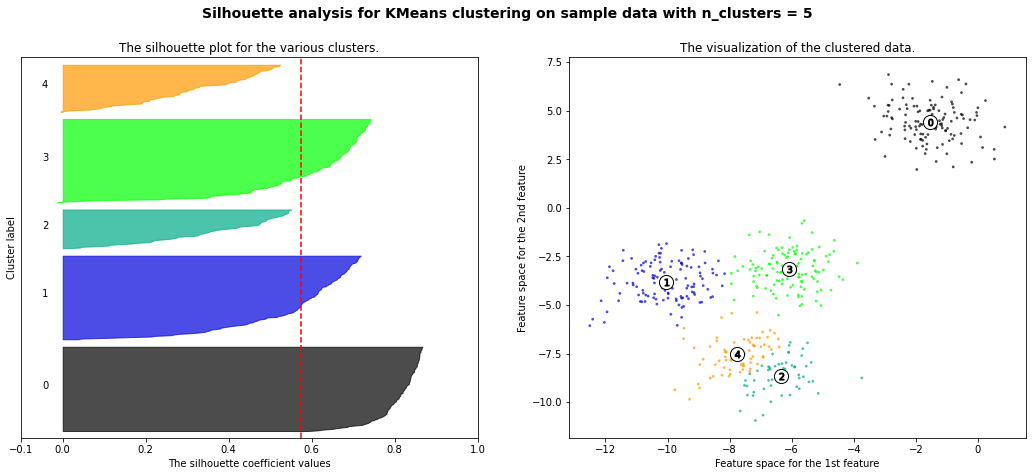

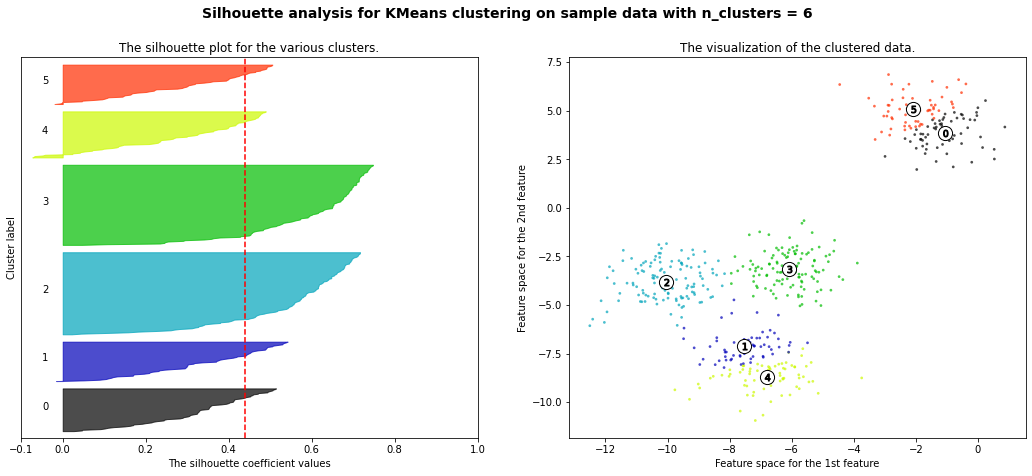

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Other measures

There are many other clustering evaluation measures. The code example below shows how to compute them in the context of the DBSCAN algorithm.

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))



Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626
